In [86]:
from transformers import SegformerImageProcessor, AutoModelForSemanticSegmentation
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch.nn as nn

processor = SegformerImageProcessor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = AutoModelForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")

url = "./50c23ed8cfc61d9844d7.jpg"

image = Image.open(url)
inputs = processor(images=image, return_tensors="pt")

outputs = model(**inputs)

logits = outputs.logits.cpu()

upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],
    mode="bilinear",
    align_corners=False,
    
)

pred_seg = upsampled_logits.argmax(dim=1)[0]



c:\Users\19521\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\models\segformer\image_processing_segformer.py:99: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


Background
Hair
Upper-clothes
Skirt
Pants
Face
Left-leg
Right-leg
Left-arm
Right-arm
Predicted labels have been saved to predicted_labels.txt


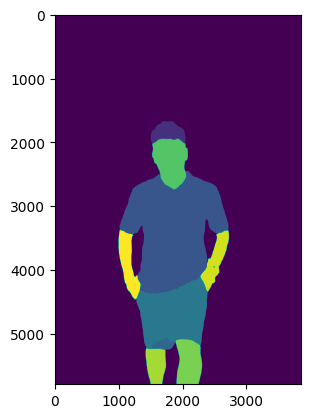

In [87]:
from PIL import Image
import requests
import torch
from transformers import AutoConfig

# Load Mask2Former configuration from your custom file
configuration = AutoConfig.from_pretrained('./config.json')

# Extract the class label mapping from the configuration as a dictionary
class_id_to_label = {
    "0": "Background",
    "1": "Hat",
    "2": "Hair",
    "3": "Sunglasses",
    "4": "Upper-clothes",
    "5": "Skirt",
    "6": "Pants",
    "7": "Dress",
    "8": "Belt",
    "9": "Left-shoe",
    "10": "Right-shoe",
    "11": "Face",
    "12": "Left-leg",
    "13": "Right-leg",
    "14": "Left-arm",
    "15": "Right-arm",
    "16": "Bag",
    "17": "Scarf"
}

# Extract segment IDs from the segmentation map (Replace 'pred_seg' with your actual segmentation map)
segmentation_map = pred_seg
segment_ids = torch.unique(segmentation_map)

# Map segment IDs to class labels
predicted_labels = [class_id_to_label.get(str(segment_id.item()), "Unknown") for segment_id in segment_ids]
label_text = '\n'.join(predicted_labels)
print(label_text)

# Save the label text to a file
file_path = 'predicted_labels.txt'
with open(file_path, 'w') as file:
    file.write(label_text)

# Print a message to confirm that the labels have been saved
print(f'Predicted labels have been saved to {file_path}')
plt.imshow(pred_seg)